✅ 1. Import Libraries dan Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import shap


d:\Tweet Multiclass Sentimen\Dynamic Pricing for Ride-Sharing App\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ 2. Load Dataset

In [2]:
# Asumsikan CSV dari data yang kamu punya
df = pd.read_csv("dynamic_pricing.csv")

# Tampilkan 5 data pertama
print(df.head())


   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium                      76  

✅ 3. Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [4]:
df.describe(include='all')

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,1000,1000,1000.00000,1000.000000
unique,NaN,NaN,3,3,NaN,NaN,4,2,NaN,NaN
top,NaN,NaN,Urban,Silver,NaN,NaN,Night,Premium,NaN,NaN
freq,NaN,NaN,346,367,NaN,NaN,276,522,NaN,NaN
mean,60.372000,27.076000,NaN,NaN,50.031000,4.257220,NaN,NaN,99.58800,372.502623
std,23.701506,19.068346,NaN,NaN,29.313774,0.435781,NaN,NaN,49.16545,187.158756
min,20.000000,5.000000,NaN,NaN,0.000000,3.500000,NaN,NaN,10.00000,25.993449
25%,40.000000,11.000000,NaN,NaN,25.000000,3.870000,NaN,NaN,59.75000,221.365202
50%,60.000000,22.000000,NaN,NaN,51.000000,4.270000,NaN,NaN,102.00000,362.019426
75%,81.000000,38.000000,NaN,NaN,75.000000,4.632500,NaN,NaN,143.00000,510.497504


Check null values :

In [5]:
df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

Check duplicate values :

In [6]:
df.duplicated().sum()

np.int64(0)

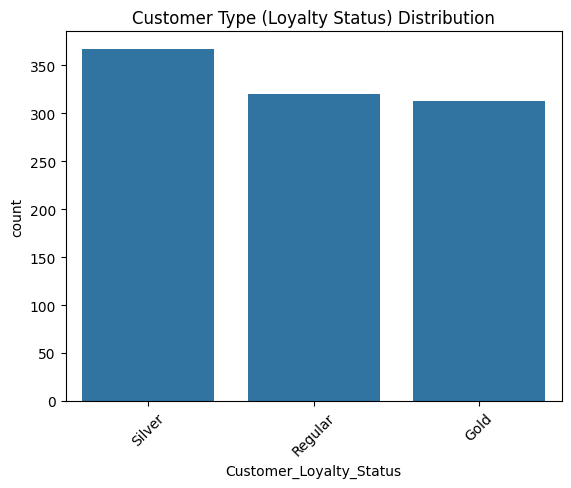

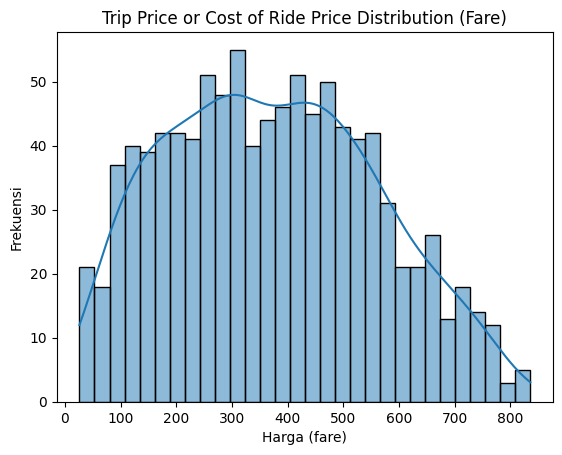

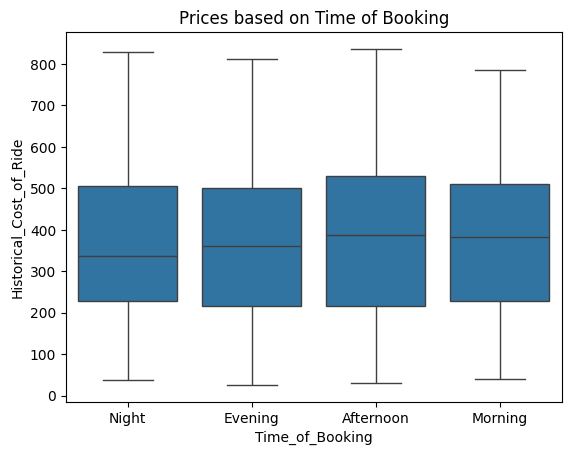

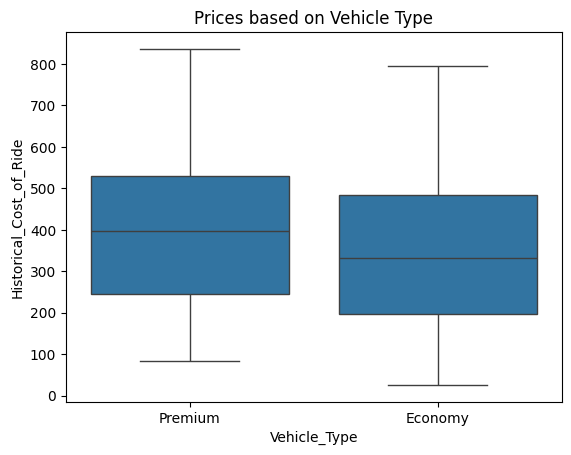

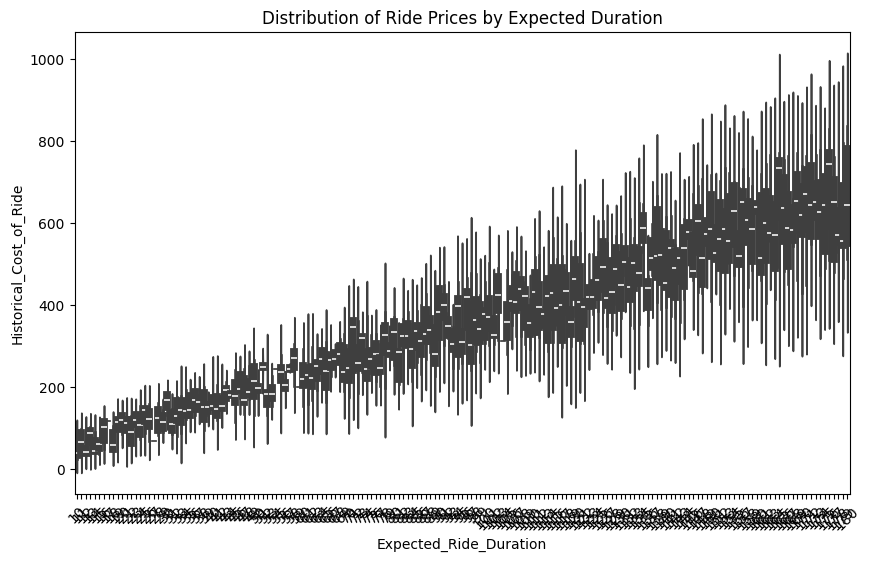

In [ ]:
# Customer Type Distributions
sns.countplot(data=df, x='Customer_Loyalty_Status')
plt.title("Customer Type (Loyalty Status) Distribution")
plt.xticks(rotation=45)
plt.show()

# Prices Distributions
sns.histplot(df['Historical_Cost_of_Ride'], bins=30, kde=True)
plt.title("Trip Price or Cost of Ride Price Distribution (Fare)")
plt.xlabel("Harga (fare)")
plt.ylabel("Frekuensi")
plt.show()

# Boxplot Prices Distribution based on Time of Booking
sns.boxplot(data=df, x='Time_of_Booking', y='Historical_Cost_of_Ride')
plt.title("Prices based on Time of Booking")
plt.show()

# Boxplot Prices Distribution based on Vehicle Type 
sns.boxplot(data=df, x='Vehicle_Type', y='Historical_Cost_of_Ride')
plt.title("Prices based on Vehicle Type")
plt.show()



In [19]:
df['Expected_Ride_Duration'].max()

np.int64(180)

In [18]:
df['Expected_Ride_Duration'].min()

np.int64(10)

In [20]:
df['Expected_Ride_Duration'].median()

np.float64(102.0)

In [21]:
df['Expected_Ride_Duration'].mean()

np.float64(99.588)

Create Ride Duration Category :
Short: 10–60 minute

Medium: 61–120 minute

Long: 121–180 minute

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17504\683761513.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Duration_Segment', y='Historical_Cost_of_Ride', palette='Set2')


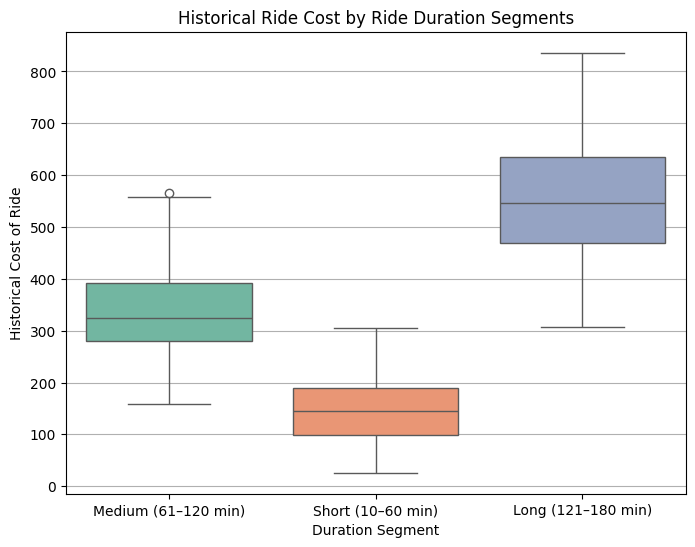

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17504\683761513.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Duration_Segment', y='Historical_Cost_of_Ride', palette='Set2')


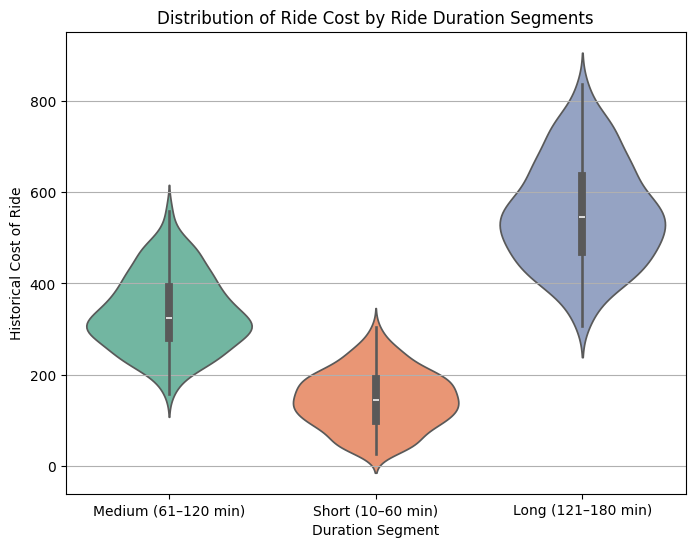

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Segmentation based on Expected Ride Duration
def segment_duration(duration):
    if duration <= 60:
        return 'Short (10–60 min)'
    elif 60 < duration <= 120:
        return 'Medium (61–120 min)'
    else:
        return 'Long (121–180 min)'

# Apply to dataframe
df['Duration_Segment'] = df['Expected_Ride_Duration'].apply(segment_duration)

# Boxplot Visualization (X : 'Duration Segment', Y : 'Historical_Cost_of_Ride')
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Duration_Segment', y='Historical_Cost_of_Ride', palette='Set2')
plt.title("Historical Ride Cost by Ride Duration Segments")
plt.xlabel("Duration Segment")
plt.ylabel("Historical Cost of Ride")
plt.grid(True, axis='y')
plt.show()

# Alternative Visualization : Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Duration_Segment', y='Historical_Cost_of_Ride', palette='Set2')
plt.title("Distribution of Ride Cost by Ride Duration Segments")
plt.xlabel("Duration Segment")
plt.ylabel("Historical Cost of Ride")
plt.grid(True, axis='y')
plt.show()


✅ 3. Feature Engineering

In [ ]:

# Segmentation based on Expected Ride Duration
def segment_duration(duration):
    if duration <= 60:
        return 'Short (10–60 min)'
    elif 60 < duration <= 120:
        return 'Medium (61–120 min)'
    else:
        return 'Long (121–180 min)'

# Apply to dataframe
df['Duration_Segment'] = df['Expected_Ride_Duration'].apply(segment_duration)


# Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Duration_Segment'] = le.fit_transform(df['Duration_Segment'])


df['Duration_Segment'].unique()  

array([1, 2, 0])

*Note: LabelEncoder sorts alphabetically when encoding.

If you want a specific order (example : Short = 0, Medium = 1, Long = 2), it is better to avoid LabelEncoder and use manual mapping:

In [ ]:
print(le.classes_)  

['Long (121–180 min)' 'Medium (61–120 min)' 'Short (10–60 min)']


In [ ]:
df['Time_of_Booking'].unique()  

array(['Night', 'Evening', 'Afternoon', 'Morning'], dtype=object)

In [ ]:
# Add surge multiplier
# Surge Multiplier = the ratio between the number of passengers (riders) and the number of drivers in a given area and time
# It's simply a matter of supply and demand. If demand is high (Number_of_Riders) and supply is low (Number_of_Drivers), prices will rise, and vice versa :)
df['Surge_Multiplier'] = df['Number_of_Riders'] / df['Number_of_Drivers']

# Why choose “Evening” and “Night” as peak hours?
# Commuting and evening activities:
# Many people return home from work or school between 5 and 8 p.m. (Evening).
# Social activities, shopping, dinner, etc. also often take place in the evening (Night).
# This causes a surge in demand for vehicles.
# Flag peak hour
df['Is_Peak'] = df['Time_of_Booking'].isin(['Evening', 'Night']).astype(int)

# Assumed Speed    | typical average speed in the city
# 0.6 km/minute or 40km/hr.
# Distance simulation based on Ride Duration
df['Distance_KM'] = df['Expected_Ride_Duration'] * 0.6



In [35]:
df['Surge_Multiplier'].head()

0    2.000000
1    1.487179
2    1.354839
3    3.178571
4    3.545455
Name: Surge_Multiplier, dtype: float64

In [37]:
df['Is_Peak'].head()

0    1
1    1
2    0
3    0
4    0
Name: Is_Peak, dtype: int64

In [ ]:
df['Distance_KM'].head() 

0    54.0
1    25.8
2    45.6
3    80.4
4    89.4
Name: Distance_KM, dtype: float64

In [ ]:
df.columns 

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride', 'Duration_Segment', 'Surge_Multiplier',
       'Is_Peak', 'Distance_KM'],
      dtype='object')

✅ 4. Categorical Columns Encoding

In [44]:
categorical_cols = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [45]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,Duration_Segment,Surge_Multiplier,Is_Peak,Distance_KM
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,1,2.000000,1,54.0
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,2,1.487179,1,25.8
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,1,1.354839,0,45.6
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,0,3.178571,0,80.4
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,0,3.545455,0,89.4


In [49]:
df['Duration_Segment'].dtype


dtype('int64')

In [ ]:
df_encoded.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides',
       'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride',
       'Duration_Segment', 'Surge_Multiplier', 'Is_Peak', 'Distance_KM',
       'Location_Category_Suburban', 'Location_Category_Urban',
       'Customer_Loyalty_Status_Regular', 'Customer_Loyalty_Status_Silver',
       'Time_of_Booking_Evening', 'Time_of_Booking_Morning',
       'Time_of_Booking_Night', 'Vehicle_Type_Premium'],
      dtype='object')

In [54]:
df_encoded.head()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride,Duration_Segment,Surge_Multiplier,Is_Peak,Distance_KM,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_Premium
0,90,45,13,4.47,90,284.257273,1,2.000000,1,54.0,False,True,False,True,False,False,True,True
1,58,39,72,4.06,43,173.874753,2,1.487179,1,25.8,True,False,False,True,True,False,False,False
2,42,31,0,3.99,76,329.795469,1,1.354839,0,45.6,False,False,False,True,False,False,False,True
3,89,28,67,4.31,134,470.201232,0,3.178571,0,80.4,False,False,True,False,False,False,False,True
4,78,22,74,3.77,149,579.681422,0,3.545455,0,89.4,False,False,True,False,False,False,False,False


✅ 5. Split the Data and Normalization

In [50]:
# Target and Feature
X = df_encoded.drop(columns=['Historical_Cost_of_Ride'])
y = df_encoded['Historical_Cost_of_Ride']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


✅ 6. Modeling with XGBoost

In [51]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = model.predict(X_test_scaled)


✅ 7. Model Evaluation

In [52]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")


MAE: 54.52
RMSE: 73.42
R^2 Score: 0.85


In [55]:
df['Historical_Cost_of_Ride'].describe()

count    1000.000000
mean      372.502623
std       187.158756
min        25.993449
25%       221.365202
50%       362.019426
75%       510.497504
max       836.116419
Name: Historical_Cost_of_Ride, dtype: float64

In [ ]:
✅ 8. Model Interpretation (SHAP)

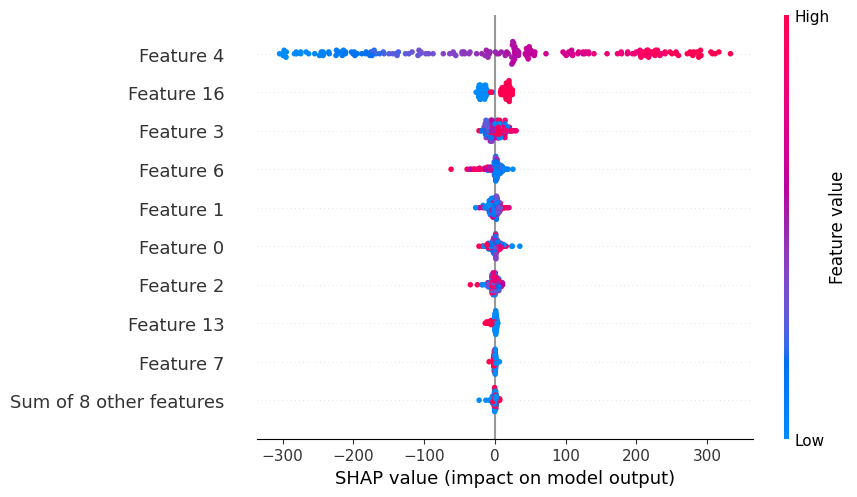

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test_scaled)

# Plot the 10 features that most impactful
shap.plots.beeswarm(shap_values, max_display=10)


In [59]:
import numpy as np

# Mean absolute SHAP value per feature
mean_shap_values = np.abs(shap_values.values).mean(axis=0)

# Urutan index fitur dari yang paling berpengaruh
top_indices = np.argsort(mean_shap_values)[::-1][:10]

# Nama fitur dari top 10
top_feature_names = X.columns[top_indices]

# Tampilkan
print("Top 10 most impactful features:")
for i, name in enumerate(top_feature_names, 1):
    print(f"{i}. {name}")


Top 10 most impactful features:
1. Expected_Ride_Duration
2. Vehicle_Type_Premium
3. Average_Ratings
4. Surge_Multiplier
5. Number_of_Drivers
6. Number_of_Riders
7. Number_of_Past_Rides
8. Time_of_Booking_Evening
9. Is_Peak
10. Customer_Loyalty_Status_Regular


Pearson Correlation

In [61]:
# All features correlation to the target
correlations = df_encoded.corr()

# correlation to the target (label)
target_corr = correlations['Historical_Cost_of_Ride'].drop('Historical_Cost_of_Ride').sort_values(ascending=False)

# 10 features that has the most correlation to the label
print("Top 10 fitur dengan korelasi tertinggi ke target:")
print(target_corr.head(10))


Top 10 fitur dengan korelasi tertinggi ke target:
Expected_Ride_Duration             0.927547
Distance_KM                        0.927547
Vehicle_Type_Premium               0.132640
Number_of_Past_Rides               0.035859
Customer_Loyalty_Status_Regular    0.027953
Number_of_Drivers                  0.017082
Time_of_Booking_Morning            0.016975
Location_Category_Suburban         0.006693
Number_of_Riders                   0.005826
Average_Ratings                   -0.001063
Name: Historical_Cost_of_Ride, dtype: float64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17504\1156478916.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette='viridis')


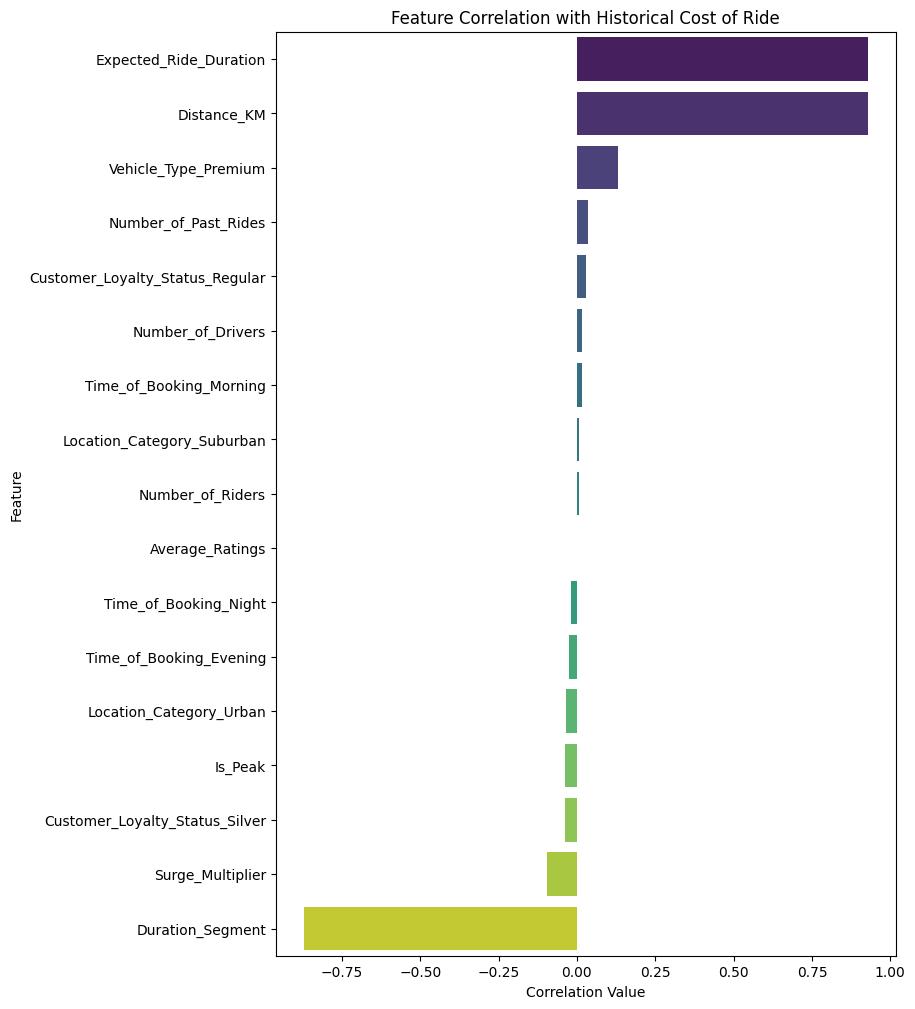

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the entire plot (width=8, height=12)
plt.figure(figsize=(8, 12))

# Create a horizontal bar plot to display correlation values
# 'target_corr.values' are the correlation coefficients
# 'target_corr.index' are the corresponding feature names
# 'palette="viridis"' gives the bars a gradient color style
sns.barplot(x=target_corr.values, y=target_corr.index, palette='viridis')

# Add a title to the plot
plt.title('Feature Correlation with Historical Cost of Ride')

# Label the x-axis
plt.xlabel('Correlation Value')

# Label the y-axis
plt.ylabel('Feature')

# Display the plot
plt.show()


Plot: Actual vs Predicted

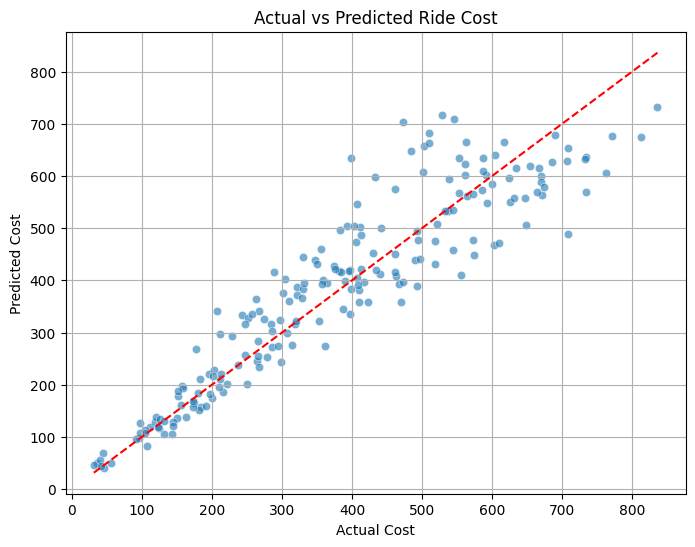

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Prediksi
y_pred = model.predict(X_test_scaled)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal Line
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Actual vs Predicted Ride Cost')
plt.grid(True)
plt.show()


Plot: Residuals (Error)

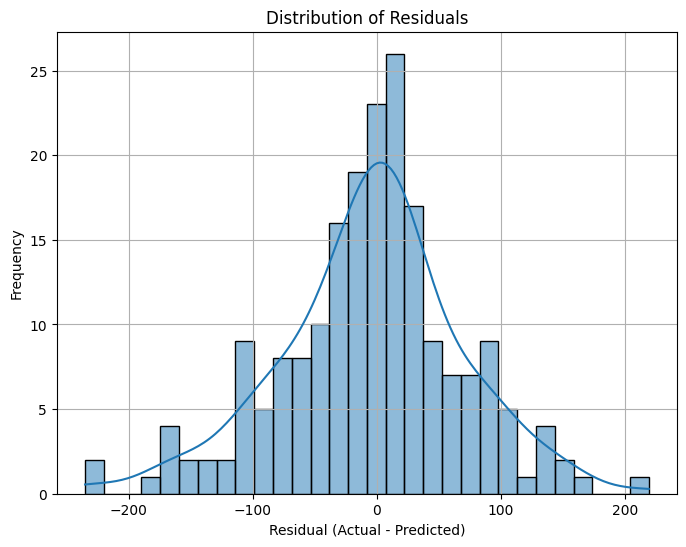

In [58]:
# Residuals
residuals = y_test - y_pred

# Plot
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Comparison with other models :

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# List of models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor(),
    # Optional: tambahkan model XGBoost jika sudah tersedia sebelumnya
    # "XGBoost": xgb.XGBRegressor(random_state=42)
}

# Dictionary to store results
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R² Score": round(r2, 4)
    })

# Convert to DataFrame and display
results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)
print(results_df)


               Model    MAE   RMSE  R² Score
0  Linear Regression  52.86  67.96    0.8733
2  Gradient Boosting  54.40  73.12    0.8533
1      Random Forest  55.62  75.07    0.8454
4      KNN Regressor  73.74  93.06    0.7625
3      Decision Tree  71.30  98.01    0.7365
